In [1]:
# Step 1: Load and preprocess the data
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score
import kagglehub
import matplotlib.pyplot as plt 
import seaborn as sns   

# Download latest version of the dataset
path = kagglehub.dataset_download("shivanandmn/multilabel-classification-dataset")

print("Path to dataset files:", path)

# Load the dataset
url_train = f'{path}/train.csv'
train_set  = pd.read_csv(url_train)

Path to dataset files: /home/lolli/.cache/kagglehub/datasets/shivanandmn/multilabel-classification-dataset/versions/1


In [2]:
train_set.head()

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0


In [3]:

train_set.drop(columns=['ID'], inplace=True)
# Preprocess the data

# Combine the category columns into a list of categories for each paper
categories = ['Computer Science', 'Physics', 'Mathematics', 'Statistics', 'Quantitative Biology', 'Quantitative Finance']
train_set['Categories'] = train_set[categories].apply(lambda row: [cat for cat in categories if row[cat] == 1], axis=1)

train_set.head()

,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,Categories
0,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0,[Computer Science]
1,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0,[Computer Science]
2,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0,[Mathematics]
3,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0,[Mathematics]
4,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0,"[Computer Science, Statistics]"


/tmp/ipykernel_149761/3792989851.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


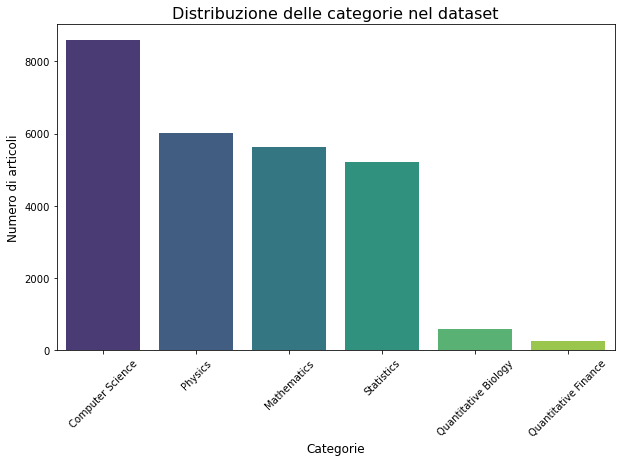

Number of occurrency for each category:
Computer Science: 8594
Physics: 6013
Mathematics: 5618
Statistics: 5206
Quantitative Biology: 587
Quantitative Finance: 249


In [4]:
# 1. Visualizzazione della distribuzione delle categorie
category_counts = train_set[categories].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
plt.title("Distribuzione delle categorie nel dataset", fontsize=16)
plt.ylabel("Numero di articoli", fontsize=12)
plt.xlabel("Categorie", fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Stampa del numero di occorrenze per ogni categoria
print("Number of occurrency for each category:")
for category, count in category_counts.items():
    print(f"{category}: {count}")

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

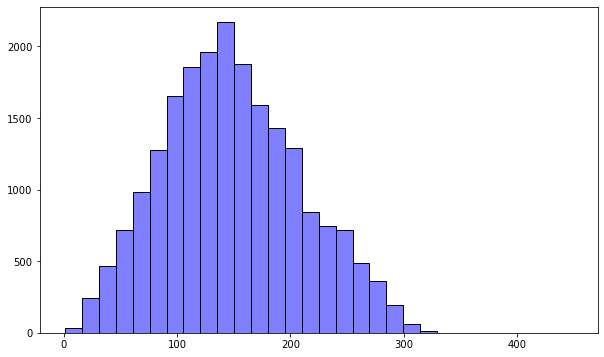

In [5]:
# 2. Esplorazione della lunghezza dei testi
# Aggiungiamo una colonna che rappresenta la lunghezza dell'abstract
train_set['Text_Length'] = train_set['ABSTRACT'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10, 6))
sns.histplot(train_set['Text_Length'], bins=30, kde=True, color='blue')
plt.title("Distribuzione della lunghezza dei testi (Abstract)", fontsize=16)
plt.xlabel("Numero di parole", fontsize=12)
plt.ylabel("Frequenza", fontsize=12)
plt.show()

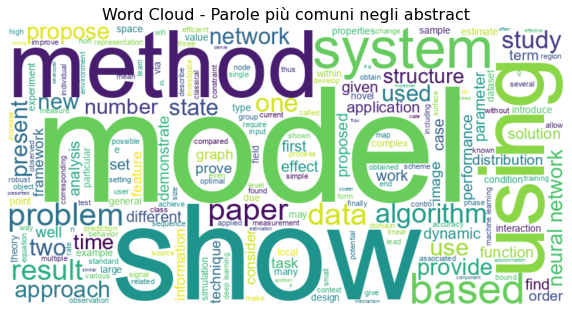

In [8]:
from wordcloud import WordCloud
from collections import Counter

# Preprocess the text data
train_set['TITLE'] = train_set['TITLE'].str.lower().str.replace(r'[^\\w\\s]', '').str.replace(r'\\d+', '').str.strip()
train_set['ABSTRACT'] = train_set['ABSTRACT'].str.lower().str.replace(r'[^\\w\\s]', '').str.replace(r'\\d+', '').str.strip()
train_set['TEXT'] = train_set['TITLE'] + ' ' + train_set['ABSTRACT']

# Genera la WordCloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white",
    font_path="ARIAL.TTF"  # Specifica il font
).generate(' '.join(train_set['TEXT']))

# Mostra la WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Parole più comuni negli abstract", fontsize=16)
plt.show()

In [ ]:

# Binarize the labels
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(train_set['Categories'])

# Vectorize the text data
tfidf = TfidfVectorizer(max_features=10000)
X = tfidf.fit_transform(train_set['ABSTRACT'])


In [ ]:
y

In [ ]:
X

In [ ]:

# Step 2: Implement a machine learning classifier
classifier = LogisticRegression()


In [ ]:

from sklearn.multiclass import OneVsRestClassifier

# Step 3: Evaluate the classifier using suitable metrics
kf = KFold(n_splits=5, shuffle=True, random_state=42)
f1_scores = []
accuracy_scores = []

ovr_classifier = OneVsRestClassifier(classifier)

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    ovr_classifier.fit(X_train, y_train)
    y_pred = ovr_classifier.predict(X_test)
    
    f1_scores.append(f1_score(y_test, y_pred, average='micro'))
    accuracy_scores.append(accuracy_score(y_test, y_pred))


In [ ]:

# Step 4: Split data for k-fold cross-validation
# (Already done in the loop above)

# Step 5: Run the evaluation
print("F1 Scores: ", f1_scores)


In [ ]:
print("Accuracy Scores: ", accuracy_scores)

# Step 6: Compare with dedicated baselines
# (Assuming we have baseline scores to compare with)

# Step 7: Analyze the obtained results
print("Average F1 Score: ", sum(f1_scores) / len(f1_scores))
print("Average Accuracy Score: ", sum(accuracy_scores) / len(accuracy_scores))